## Dependencias

In [ ]:
from keras.models import load_model
from keras import models

from keras.utils import load_img,img_to_array
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/deep learning/'

## Cargar modelo entrenado

In [ ]:
#modelo = load_model(os.path.join(path,'gatos_perros_transfer_vgg16.h5'))
modelo = load_model(os.path.join(path,'cats_vs_dogs_gpu.h5'))
modelo.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,123 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Cargar Imagen y convertirla en tensor

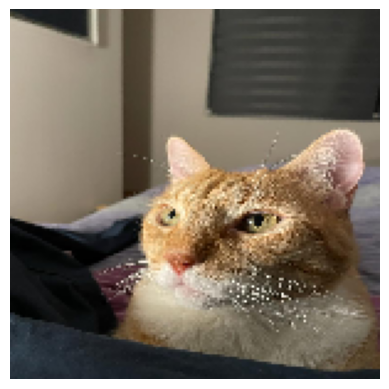

In [ ]:
imagen = os.path.join(path,'jamie.jpeg')

imagen = load_img(imagen,target_size=(150,150))

tensor = img_to_array(imagen)
tensor = np.expand_dims(tensor,axis=0)
tensor /=255

plt.imshow(tensor[0])
plt.axis(False)
plt.show()

In [ ]:
tensor,tensor.shape

(array([[[[0.16470589, 0.17254902, 0.16862746],
          [0.13725491, 0.15294118, 0.15686275],
          [0.10588235, 0.13725491, 0.14901961],
          ...,
          [0.16470589, 0.16470589, 0.15686275],
          [0.1764706 , 0.1764706 , 0.16862746],
          [0.16862746, 0.16862746, 0.16078432]],
 
         [[0.24705882, 0.24705882, 0.2       ],
          [0.20392157, 0.21176471, 0.16862746],
          [0.17254902, 0.19215687, 0.16470589],
          ...,
          [0.16862746, 0.16862746, 0.16078432],
          [0.16470589, 0.16470589, 0.15686275],
          [0.15686275, 0.15686275, 0.14901961]],
 
         [[0.29411766, 0.28627452, 0.20392157],
          [0.23921569, 0.23137255, 0.17254902],
          [0.25490198, 0.25882354, 0.22745098],
          ...,
          [0.16078432, 0.16078432, 0.15294118],
          [0.16470589, 0.16470589, 0.15686275],
          [0.16078432, 0.16078432, 0.15294118]],
 
         ...,
 
         [[0.16078432, 0.2       , 0.23921569],
          [0.16862

## Obtención de capas de activación

In [ ]:
from keras.layers import Input

# Define a new input layer with the same shape as the input tensor
input_layer = Input(shape=tensor.shape[1:])

activaciones = [] # Initialize the list here
# Build functional models for the first 4 layers using the new input layer
x = input_layer
for i in range(4): # Get activations for the first 4 layers
    x = modelo.layers[i](x) # Pass the output of the previous layer to the current layer
    activation_model = models.Model(inputs=input_layer, outputs=x)
    activaciones.append(activation_model.predict(tensor))

# The shape of the first activation
activaciones[0].shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


(1, 148, 148, 32)

## Visualización de canales

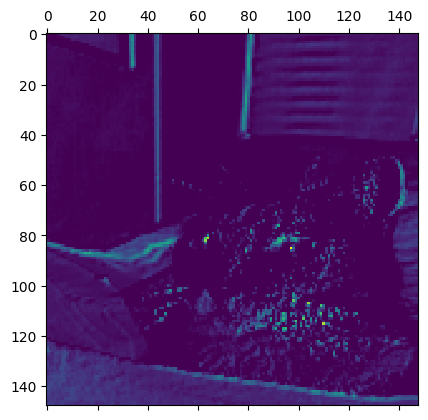

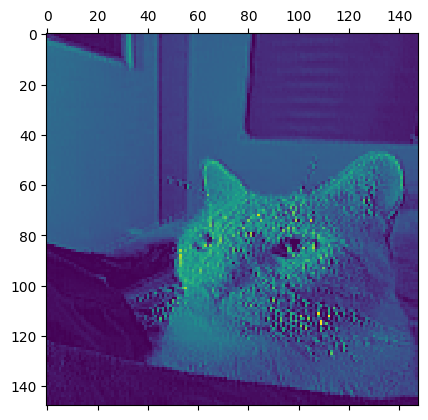

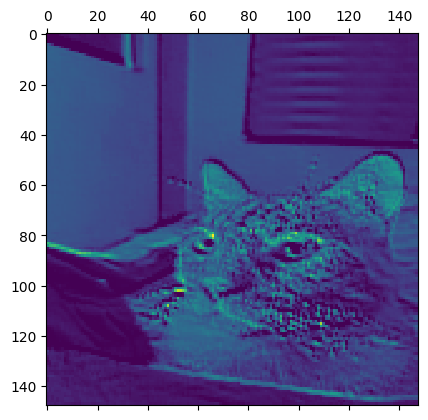

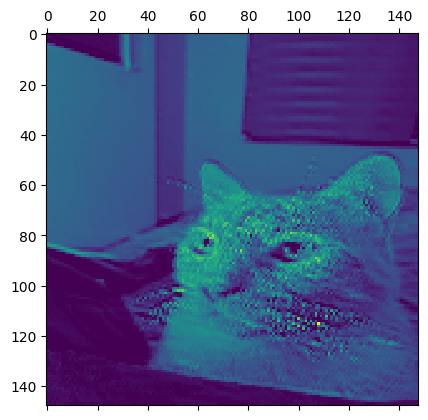

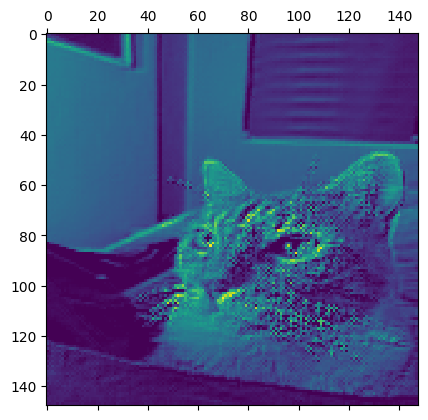

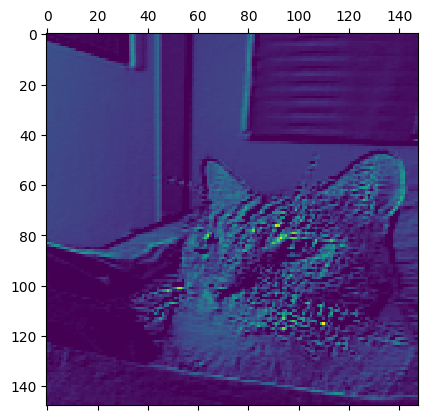

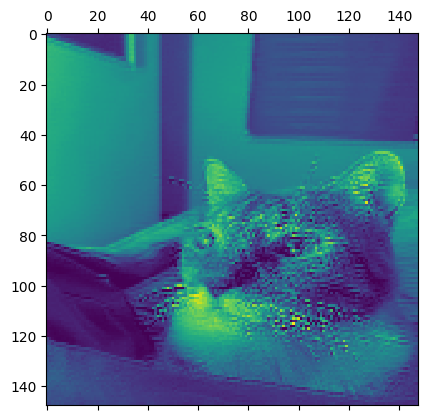

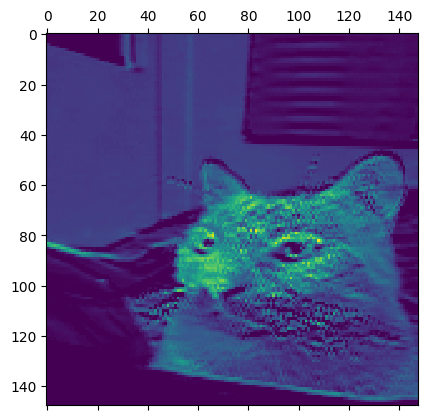

In [ ]:
for i in range(1,8+1):
    plt.matshow(activaciones[0][0,:,:,i],cmap='viridis')

## Visualización de cada canal para cada capa de activación

In [ ]:
nombres_capas = list(map(lambda x:x.name, modelo.layers[:8]))
imagenes_por_fila = 16

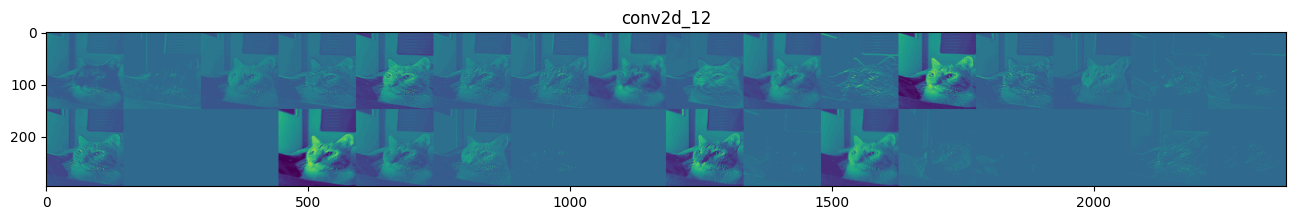

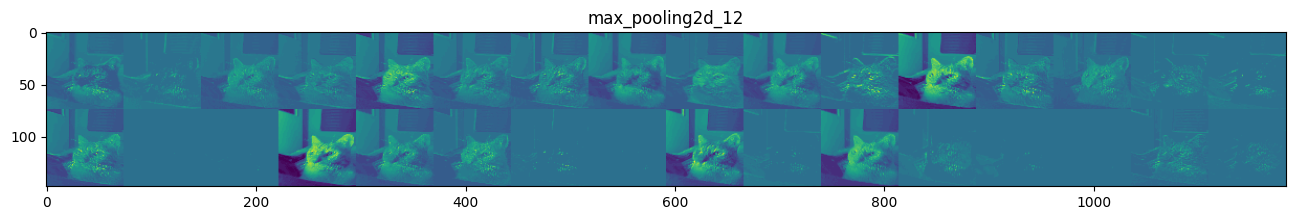

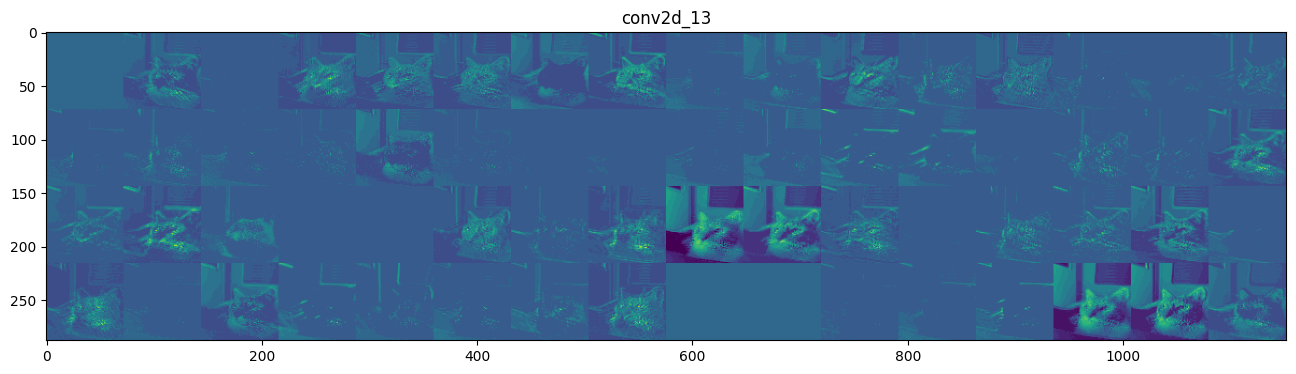

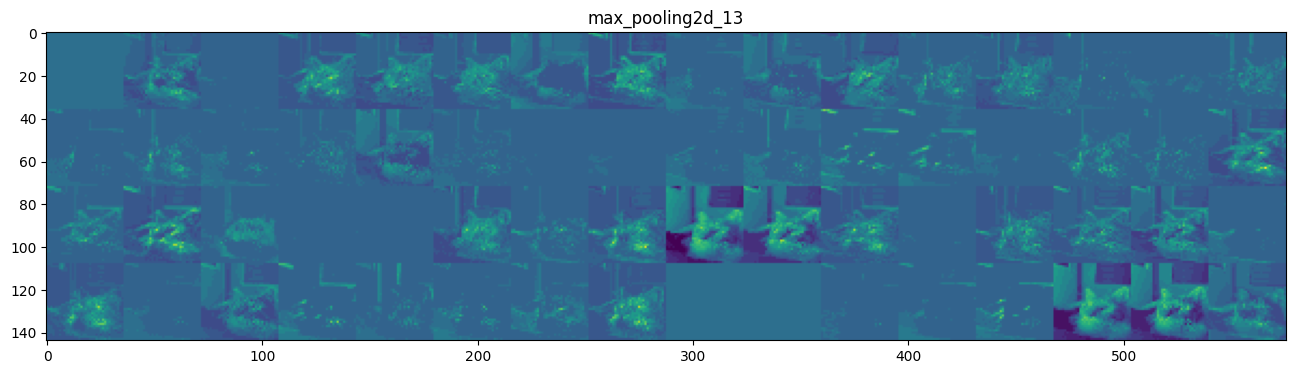

In [ ]:

for nombre,activacion in zip(nombres_capas,activaciones):
    carac = activacion.shape[-1]
    tam = activacion.shape[1]
    cols = carac//imagenes_por_fila
    gradilla = np.zeros((tam*cols,imagenes_por_fila*tam))
    for col in range(cols):
        for fila in range(imagenes_por_fila):
            canal = activacion[0,:,:,col*imagenes_por_fila+fila]
            canal-= canal.mean()
            canal*=64
            canal+=128
            canal = np.clip(canal,0,255).astype('uint8')
            gradilla[col*tam:(col+1)*tam,fila*tam :(fila+1)*tam] = canal
    escala = 1/tam
    plt.figure(figsize=(escala*gradilla.shape[1],escala*gradilla.shape[0]))
    plt.title(nombre)
    plt.grid(False)
    plt.imshow(gradilla,aspect='auto',cmap='viridis')

In [ ]:
modelo.predict(tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.40138787]], dtype=float32)